<h1> ARBNB </h1>
<hr>

Este es el notebook donde se desarrollará el caso de negocio para ARBNB. A continuación se realiza la carga de los módulos requeridos para el desarrollo del proyecto.

In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import re
import datetime as dt
from sklearn.cluster import KMeans, DBSCAN, OPTICS
import statsmodels.api as sm

Se realiza la carga de la base de datos:

In [301]:
df = pd.read_excel("muestra_airbnb_nyc.xlsx")

In [297]:
df.columns

Index(['id', 'name', 'summary', 'description', 'experiences_offered',
       'neighborhood_overview', 'transit', 'house_rules', 'host_id',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'street', 'neighbourhood', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'price', 'guests_included', 'extra_people',
       'minimum_nights', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'calculated_host_listings_count',


Esta base de datos cuenta con un total de 3.017 registros, de los cuales, se tienen 82 variables.

In [302]:
df["year"] = df["host_since"].apply(lambda x: dt.datetime.utcfromtimestamp((x - 25569) * 86400.0).year if pd.notna(x) else x)
df["month"] = df["host_since"].apply(lambda x: dt.datetime.utcfromtimestamp((x - 25569) * 86400.0).month if pd.notna(x) else x)
df["street"] = df["street"].apply(
    lambda x: re.sub("Elmhurts|Elmhutst", "Elmhurst",
              re.sub("^N.+", "New York",
              re.sub(",\s*\w*\s*\w*", "",       
              re.sub("(\s*)$|^(\s+)", "",
              re.sub("(,\s+Ny)$", "",
              re.sub(",\s+United States", "", x.title()))))))
    )

In [303]:
df.drop(['name', 'summary', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'house_rules', 'neighbourhood',  'street', 'host_since',
         'property_type', 'bed_type', 'amenities', 'calendar_updated', 'has_availability', 'check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
         'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly',
         'parking', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
         'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable', 'random'], axis = 1, inplace=True)

In [319]:
kmeans = KMeans(n_clusters=8, n_init='auto').fit_predict(pd.get_dummies(df[["latitude", "longitude", "price"]].fillna(0)))

In [320]:
colores = []
for i in kmeans:
    colores.append(list(colors.CSS4_COLORS.values())[10:][i])


<AxesSubplot: xlabel='number_of_reviews', ylabel='review_scores_rating'>

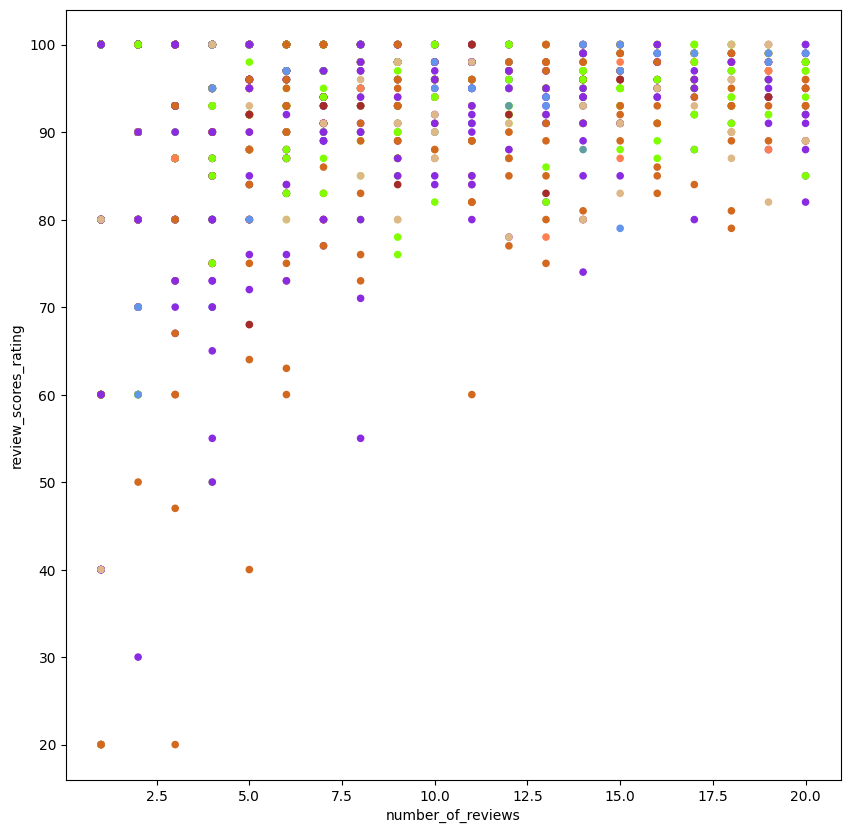

In [337]:
df.plot(x = "number_of_reviews", y = "review_scores_rating", kind = "scatter", c = colores, figsize= (10,10))

In [327]:
mod = sm.OLS(pd.get_dummies(df.fillna(0))["price"], sm.add_constant(pd.get_dummies(df.fillna(0)).drop(["id", "host_id", "price"], axis=1)))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     80.16
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:41:51   Log-Likelihood:                -16754.
No. Observations:                3017   AIC:                         3.359e+04
Df Residuals:                    2974   BIC:                         3.385e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [336]:
mod_1 = sm.OLS(pd.get_dummies(df.fillna(0))["price"], sm.add_constant(pd.get_dummies(df.fillna(0)).drop(["id", "host_id", "host_identity_verified", "price", "host_response_rate", 
                                                                                                         "host_is_superhost", "beds", "guests_included", "number_of_reviews", "number_of_reviews_ltm",
                                                                                                         "availability_30", "availability_60", "availability_90", "availability_365",
                                                                                                         "review_scores_rating", "review_scores_accuracy", "review_scores_communication",
                                                                                                         "instant_bookable"], axis=1)))
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     118.1
Date:                Fri, 26 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:02:20   Log-Likelihood:                -16801.
No. Observations:                3017   AIC:                         3.366e+04
Df Residuals:                    2989   BIC:                         3.383e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------